# Classification Tutorial

In this tutorial, we will learn how to do classification in Python using scikit and also see how to do the same using Vowpal Wabbit. We will classify a piece of text into two categories - spam and not spam (called ham). We will also learn about feature representation using Bag of Words (BOW).

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Read the data into a dataframe using pandas
df = pd.read_csv('SPAM_HAM_Data.csv', sep = ",")

In [64]:
len(df)

5572

In [3]:
# Let's look at the first few samples
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


# Feature engineering

In [31]:
# the package we will be using handles only numerical values for labels. So, let's map our classes to reals.
def return_label(x):
    if x=="ham":
        return 0.
    else:
        return 1.
    
df['label'] = df['Category'].apply(return_label)

The data that we have must be conducive to learning. This is where one would need some domain knowledge. Just consider how you would try to yourself classify text into spam or not spam in a language you have absolutely no familiarity with. 


You don't have enough time to actually learn the language, so you want to find heuristics that will help you be an accurate classifier. This will give you a clue as to what might be useful to a computer.

In [5]:
# Let's look at message length
df['msg_len'] = df['Message'].apply(len)

In [6]:
df.head()

,Category,Message,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
df[df['Category'] == 'ham']['msg_len'].describe()

count    4825.000000
mean       71.448290
std        58.434864
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: msg_len, dtype: float64

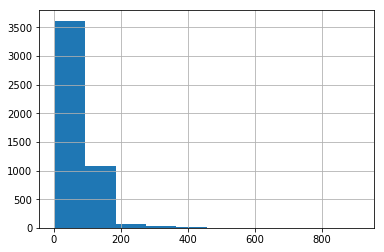

In [8]:
df[df['Category'] == 'ham']['msg_len'].hist()

In [9]:
df[df['Category'] == 'spam']['msg_len'].describe()

count    747.000000
mean     137.989290
std       29.980287
min        7.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: msg_len, dtype: float64

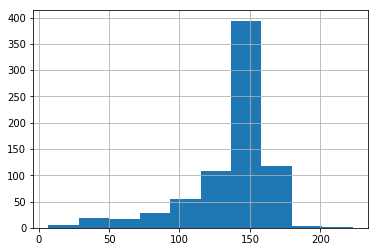

In [10]:
df[df['Category'] == 'spam']['msg_len'].hist()

In [ ]:
# same scale x axis 

Clearly, it looks like message length is a good indicator of the category of message

# Feature Extraction/Engineering using Bag Of Words (BOW)

When dealing with text, one needs to be careful. Right now, we are not linguists who understand the semantics of the language. We want to deal with this abstractly. We want our method to be language agnostic. 

BOW is one such method. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

 - A vocabulary of known words.
 - A measure of the presence of known words.

In [67]:
s1 = "Pavithra likes everything Harry Potter "
s2 = "Pavithra is a Potter Head "
s3 = "Clearly, Pavithra likes talking about pavithra "

# Tokenization
print(s1.split())
print(s2.split())
print(s3.split())

['Pavithra', 'likes', 'everything', 'Harry', 'Potter']
['Pavithra', 'is', 'a', 'Potter', 'Head']
['Clearly,', 'Pavithra', 'likes', 'talking', 'about', 'pavithra']


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [69]:
test = count_vec.fit_transform([s3])

In [14]:
test

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [70]:
print(test)

  (0, 0)	1
  (0, 4)	1
  (0, 2)	1
  (0, 3)	2
  (0, 1)	1


In [71]:
print(test.todense())

[[1 1 1 2 1]]


In [17]:
count_vec.get_feature_names()[3]

'pavithra'

In [18]:
count_vec.get_feature_names()

['about', 'clearly', 'likes', 'pavithra', 'talking']

In [19]:
corpus = [s1,s2,s3]
corpus

['Pavithra likes everything Harry Potter ',
 'Pavithra is a Potter Head ',
 'Clearly, Pavithra likes talking about pavithra ']

In [ ]:
# include image (from morning session)

In [20]:
test = count_vec.fit_transform(corpus)

In [21]:
print(test.todense())
print(count_vec.get_feature_names())

[[0 0 1 1 0 0 1 1 1 0]
 [0 0 0 0 1 1 0 1 1 0]
 [1 1 0 0 0 0 1 2 0 1]]
['about', 'clearly', 'everything', 'harry', 'head', 'is', 'likes', 'pavithra', 'potter', 'talking']


In [22]:
count_vec = CountVectorizer(stop_words='english')

In [23]:
test = count_vec.fit_transform(corpus)

In [24]:
print(test.todense())
print(count_vec.get_feature_names())

[[0 1 0 1 1 1 0]
 [0 0 1 0 1 1 0]
 [1 0 0 1 2 0 1]]
['clearly', 'harry', 'head', 'likes', 'pavithra', 'potter', 'talking']


In [25]:
s3 = "Pavithra also likes LOTR"
doc_mat = count_vec.transform([s1,s2,s3])

In [27]:
print(doc_mat.todense())
print(count_vec.get_feature_names())

[[0 1 0 1 1 1 0]
 [0 0 1 0 1 1 0]
 [0 0 0 1 1 0 0]]
['clearly', 'harry', 'head', 'likes', 'pavithra', 'potter', 'talking']


 Notice difference between fit_transform and transform
 - fit_transform: Learn the vocabulary dictionary and return term-document matrix.
 - transform: Transform documents to document-term matrix.

In [28]:
doc_mat.shape

(3, 7)

In [ ]:
#compute sparsity

# Data preparation

Intution for splitting data into train and test:

When you want to measure how well you have learnt something, you want to do some practice problems or take a practice exam. That is exactly what is happening here. You are putting some questions away as practice questions for yourself and learning from the rest.

In [51]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df,random_state = 2019, test_size = 0.4)

In [52]:
Y_train=training_data['label'].values
Y_test=testing_data['label'].values

In [53]:
testing_data.groupby('label')['label'].count()

label
0.0    1919
1.0     310
Name: label, dtype: int64

# Transform data into BOW

In [54]:
BOW_transformer = CountVectorizer(stop_words='english')
BOW_transformer.fit_transform(training_data['Message'].values)

<3343x6264 sparse matrix of type '<class 'numpy.int64'>'
	with 25707 stored elements in Compressed Sparse Row format>

In [55]:
train_BOW_features = BOW_transformer.transform(training_data['Message'].values)
test_BOW_features = BOW_transformer.transform(testing_data['Message'].values)

In [56]:
# append length of message to features
from scipy.sparse import hstack
X_train = hstack((train_BOW_features,training_data['msg_len'].values[:,None]))
X_test = hstack((test_BOW_features,testing_data['msg_len'].values[:,None]))

# How well does a majority class classifier do?

(1) What is a majority classifier?

- A majority classifier is one that predicts the majority class in the dataset for every sample. 

(2) Why should we care about this?

- This gives us a **baseline** to compare to. This is the simplest thing you can do if you had no access to anything else but the labels. One would expect our algorithms to do better than this.

In [ ]:
# binary class only - majority

In [57]:
pred_majority = np.array([0.]*len(testing_data))

# Classification Metrics

Once we have our classifier make predictions, we want some notion of how good our classifier is. Below are three metrics that are most commonly used in classification.

(1) Accuracy
-  How many of your predictions matched the ground truth?

(2) Precision
-  Among the ones that you predicted as spam, how many were actually spam?

(3) Recall
- Among the ones that were actually spam, how many did you predict as spam?


**Which ones should we care about?**

It depends on the problem!

In [58]:
import sklearn.metrics as metrics

print(metrics.accuracy_score(Y_test,pred_majority))

print(metrics.precision_score(Y_test,pred_majority))

print(metrics.recall_score(Y_test,pred_majority))

0.860924181247196
0.0
0.0


# Logistic Regression for classification

Logistic Regression is a statistical model that is used in classification. It can be used for binary and multi class classification. It uses the logistic function as the loss function. For more info: [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [ ]:
# recap logistic regression from session
# data representation
# not a cook book
# regularization
# choice of algorithms

In [72]:
from sklearn.linear_model import LogisticRegression

Spam_model = LogisticRegression(solver='liblinear', penalty='l1') 
# Things to try:
# Naive Bayes
# without regularization
# different knobs

# To learn more about the solvers:
# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

Spam_model.fit(X_train, Y_train)
pred = Spam_model.predict(X_test)

In [ ]:
# parameter tuning

In [73]:
Spam_model.coef_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01399448]])

In [80]:
all_features = BOW_transformer.get_feature_names()+['msg_len']

In [87]:
Spam_model.coef_[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.01399448])

In [92]:
pd.DataFrame({'name':all_features,'value':Spam_model.coef_[0]})['value'].describe()

count    6265.000000
mean        0.015288
std         0.209353
min        -2.143954
25%         0.000000
50%         0.000000
75%         0.000000
max         4.602855
Name: value, dtype: float64

In [ ]:
# look at the model, coeffs, interpreting model
# how many words ended up with non zero weight
# plot of prob distribution

# Model evaluation

In [60]:
pd.Series(pred).value_counts()

0.0    1952
1.0     277
dtype: int64

In [61]:
# Accuracy: How many of your predictions matched the ground truth?
print(metrics.accuracy_score(Y_test,pred))

0.9744279946164199


In [62]:
# Precision: Among the ones that you predicted as spam, how many were actually spam?
print(metrics.precision_score(Y_test,pred))

0.9566787003610109


In [63]:
# Recall: Among the ones that were actually spam, how many did you predict as spam?
print(metrics.recall_score(Y_test,pred))

0.8548387096774194


With better features, better feature engineering and more powerful algorithms, we can always do better! The stakes can be very high in some classification problems (cancer or no cancer) and different evaluation measures say different things, one must always choose what would be best for the problem.

In [ ]:
# write code for metrics

# Classification using Vowpal Wabbit

In [65]:
from vowpalwabbit import pyvw

ModuleNotFoundError: No module named 'vowpalwabbit'